<a href="https://colab.research.google.com/github/Murdocksilva/tradesniperai/blob/main/btc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo para predicción de precio BTC





Alfonso Marrero Silva

### Origen del dataset: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

## Dependencias:


In [120]:
!pip install mlxtend

In [121]:
!pip install requests

In [122]:
import pandas as pd
import numpy as np
import io
import requests
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import metrics
import warnings
from sklearn.decomposition import PCA
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, distplot

In [123]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
sns.set_style('darkgrid')

# Adquisición de datos

##Github - archivo csv

In [124]:
url = 'https://raw.githubusercontent.com/Murdocksilva/tradesniperai/main/BTC.csv'
response = requests.get(url)
content = response.content.decode('utf-8')

In [125]:
columnas = ['Date', 'Price', 'Midprice', 'Open', 'High', 'Low', 'Volumen', 'Cambio', 'Target', 'MFI', 'RSI', 'Sma97', 'Sma333', 'Sma587']

# Cargar los datos en un DataFrame, saltando la primera fila si contiene encabezados
df = pd.read_csv(io.StringIO(content), sep=';', header=0, names=columnas)

# Función para limpiar los valores numéricos
def limpiar_numero(x):
    if isinstance(x, str):
        # Manejar casos especiales
        if x.strip() in ['-', '#¡DIV/0!']:
            return np.nan
        # Primero, eliminar el símbolo de dólar y los espacios
        x = x.replace('$', '').replace(' ', '')
        # Luego, reemplazar los puntos por nada (eliminarlos)
        x = x.replace('.', '')
        # Finalmente, reemplazar la coma por punto decimal
        x = x.replace(',', '.')
    return x

# Columnas numéricas a procesar
columnas_numericas = ['Price', 'Midprice', 'Open', 'High', 'Low', 'Volumen', 'Cambio', 'MFI', 'RSI', 'Sma97', 'Sma333', 'Sma587']

# Limpiar y convertir columnas numéricas
for col in columnas_numericas:
    df[col] = df[col].apply(limpiar_numero).astype(float)

# Convertir la columna de fecha
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Mostrar las primeras filas y los tipos de datos
print(df.head())
print("\nTipos de datos:")
print(df.dtypes)

# Mostrar información sobre los valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

        Date    Price  Midprice     Open     High      Low  Volumen  Cambio  \
0 2024-07-12  56932.0   57160.0  57458.0  57652.0  56668.0   1460.0 -0.0092   
1 2024-07-11  57458.0   58374.0  57931.0  59511.0  57237.0   1370.0 -0.0082   
2 2024-07-10  57931.0   58472.0  58205.0  59588.0  57356.0    970.0 -0.0047   
3 2024-07-09  58205.0   57440.0  56873.0  58418.0  56462.0   1310.0  0.0234   
4 2024-07-08  56873.0   56425.0  56050.0  58350.0  54500.0   1700.0  0.0147   

       Target    MFI    RSI   Sma97  Sma333  Sma587  
0   Negative   36.21  36.93 -0.1170  0.1811  0.4887  
1   Negative   35.90  41.22 -0.0999  0.2083  0.5230  
2   Negative   36.42  39.63 -0.0997  0.2125  0.5284  
3   Positive   29.55  40.22 -0.1168  0.1933  0.5042  
4   Positive   29.24  31.88 -0.1335  0.1742  0.4803  

Tipos de datos:
Date        datetime64[ns]
Price              float64
Midprice           float64
Open               float64
High               float64
Low                float64
Volumen            flo

In [126]:
print("Valores nulos por columna antes de la limpieza:")
print(df.isnull().sum())

df_limpio = df.dropna()

print("\nValores nulos por columna después de la limpieza:")
print(df_limpio.isnull().sum())

print("\nPrimeras filas del DataFrame limpio:")
print(df_limpio.head())

print("\nNúmero de filas en el DataFrame original:", len(df))
print("Número de filas en el DataFrame limpio:", len(df_limpio))
print("Número de filas eliminadas:", len(df) - len(df_limpio))

df.dropna(inplace=True)

Valores nulos por columna antes de la limpieza:
Date        47
Price       47
Midprice    47
Open        47
High        47
Low         47
Volumen     66
Cambio      64
Target      47
MFI         55
RSI         47
Sma97       47
Sma333      47
Sma587      47
dtype: int64

Valores nulos por columna después de la limpieza:
Date        0
Price       0
Midprice    0
Open        0
High        0
Low         0
Volumen     0
Cambio      0
Target      0
MFI         0
RSI         0
Sma97       0
Sma333      0
Sma587      0
dtype: int64

Primeras filas del DataFrame limpio:
        Date    Price  Midprice     Open     High      Low  Volumen  Cambio  \
0 2024-07-12  56932.0   57160.0  57458.0  57652.0  56668.0   1460.0 -0.0092   
1 2024-07-11  57458.0   58374.0  57931.0  59511.0  57237.0   1370.0 -0.0082   
2 2024-07-10  57931.0   58472.0  58205.0  59588.0  57356.0    970.0 -0.0047   
3 2024-07-09  58205.0   57440.0  56873.0  58418.0  56462.0   1310.0  0.0234   
4 2024-07-08  56873.0   56425.0  560

# Descriptiva

In [127]:
df.shape

(3808, 14)

In [128]:
df.columns

Index(['Date', 'Price', 'Midprice', 'Open', 'High', 'Low', 'Volumen', 'Cambio',
       'Target', 'MFI', 'RSI', 'Sma97', 'Sma333', 'Sma587'],
      dtype='object')

venos el nombre de las columnas del dataset


In [129]:
df.head(10)

,Date,Price,Midprice,Open,High,Low,Volumen,Cambio,Target,MFI,RSI,Sma97,Sma333,Sma587
0,2024-07-12,56932.0,57160.0,57458.0,57652.0,56668.0,1460.0,-0.0092,Negative,36.21,36.93,-0.1170,0.1811,0.4887
1,2024-07-11,57458.0,58374.0,57931.0,59511.0,57237.0,1370.0,-0.0082,Negative,35.90,41.22,-0.0999,0.2083,0.5230
2,2024-07-10,57931.0,58472.0,58205.0,59588.0,57356.0,970.0,-0.0047,Negative,36.42,39.63,-0.0997,0.2125,0.5284
3,2024-07-09,58205.0,57440.0,56873.0,58418.0,56462.0,1310.0,0.0234,Positive,29.55,40.22,-0.1168,0.1933,0.5042
4,2024-07-08,56873.0,56425.0,56050.0,58350.0,54500.0,1700.0,0.0147,Positive,29.24,31.88,-0.1335,0.1742,0.4803
5,2024-07-07,56050.0,57254.5,58326.0,58563.0,55946.0,960.0,-0.0390,Negative,28.76,33.92,-0.1223,0.1935,0.5047
6,2024-07-06,58326.0,57364.0,56759.0,58538.0,56190.0,1490.0,0.0276,Positive,22.05,28.47,-0.1224,0.1978,0.5104
7,2024-07-05,56759.0,55665.5,57118.0,57604.0,53727.0,3020.0,-0.0063,Negative,21.62,27.81,-0.1501,0.1644,0.4683
8,2024-07-04,57118.0,58680.0,60298.0,60550.0,56810.0,2400.0,-0.0530,Negative,29.10,33.75,-0.1061,0.2295,0.5506
9,2024-07-03,60314.0,60962.0,62214.0,62386.0,59538.0,1010.0,-0.0306,Negative,28.80,38.26,-0.0730,0.2797,0.6140


In [130]:
df.duplicated().value_counts()

False    3808
Name: count, dtype: int64

In [131]:
df.isna() .sum()

Date        0
Price       0
Midprice    0
Open        0
High        0
Low         0
Volumen     0
Cambio      0
Target      0
MFI         0
RSI         0
Sma97       0
Sma333      0
Sma587      0
dtype: int64

In [132]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, 0 to 3845
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3808 non-null   datetime64[ns]
 1   Price     3808 non-null   float64       
 2   Midprice  3808 non-null   float64       
 3   Open      3808 non-null   float64       
 4   High      3808 non-null   float64       
 5   Low       3808 non-null   float64       
 6   Volumen   3808 non-null   float64       
 7   Cambio    3808 non-null   float64       
 8   Target    3808 non-null   object        
 9   MFI       3808 non-null   float64       
 10  RSI       3808 non-null   float64       
 11  Sma97     3808 non-null   float64       
 12  Sma333    3808 non-null   float64       
 13  Sma587    3808 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 446.2+ KB


In [133]:
df.columns = [col.strip() for col in df.columns]

for col in df.columns:
    print(f"'{col}': {type(col)}")

'Date': <class 'str'>
'Price': <class 'str'>
'Midprice': <class 'str'>
'Open': <class 'str'>
'High': <class 'str'>
'Low': <class 'str'>
'Volumen': <class 'str'>
'Cambio': <class 'str'>
'Target': <class 'str'>
'MFI': <class 'str'>
'RSI': <class 'str'>
'Sma97': <class 'str'>
'Sma333': <class 'str'>
'Sma587': <class 'str'>


In [134]:
print(df.dtypes)

Date        datetime64[ns]
Price              float64
Midprice           float64
Open               float64
High               float64
Low                float64
Volumen            float64
Cambio             float64
Target              object
MFI                float64
RSI                float64
Sma97              float64
Sma333             float64
Sma587             float64
dtype: object


verifico que el tipo de datos en cada columna siga siendo el correcto

In [135]:
df.describe(include = 'object')

,Target
count,3808
unique,2
top,Positive
freq,1971


Resumen descriptivo de las variables no numéricas

In [136]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,3808,2019-04-16 22:55:42.857142784,2014-01-01 00:00:00,2016-09-08 18:00:00,2019-04-21 12:00:00,2021-11-28 06:00:00,2024-07-12 00:00:00,NaN
Price,3808.0,16028.258062,183.0,684.875,8163.7,26869.5,72974.0,18736.43435
Midprice,3808.0,16003.18645,197.7,684.025,8112.425,26894.75,72380.0,18707.231812
Open,3808.0,16013.984296,181.1,687.65,8160.35,26866.75,72985.0,18726.328454
High,3808.0,16385.845614,211.0,705.75,8308.85,27288.0,73666.0,19139.099505
Low,3808.0,15620.527285,164.9,666.875,7877.45,26534.5,71172.0,18282.474642
Volumen,3808.0,14321.523109,10.0,2307.5,6735.0,17582.5,274850.0,20540.581658
Cambio,3808.0,0.001837,-0.3818,-0.013725,0.001,0.0169,0.2677,0.03785
MFI,3808.0,52.443574,5.71,42.85,50.955,64.67,94.74,16.439133
RSI,3808.0,53.038091,5.86,39.4225,52.455,65.7225,98.49,18.269131


In [137]:
columnas_numericas = [
    'Price',
    'Midprice',
    'Open',
    'High',
    'Low',
    'Volumen',
    'Cambio',
    'MFI',
    'RSI',
    'Sma97',
    'Sma333',
    'Sma587'
]

medias = df[columnas_numericas].mean()

print(medias.to_string(float_format='{:,.0f}'.format))

Price      16,028
Midprice   16,003
Open       16,014
High       16,386
Low        15,621
Volumen    14,322
Cambio          0
MFI            52
RSI            53
Sma97           0
Sma333          0
Sma587          0


In [138]:
columnas_numericas = [
    'Price',
    'Midprice',
    'Open',
    'High',
    'Low',
    'Volumen',
    'Cambio',
    'MFI',
    'RSI',
    'Sma97',
    'Sma333',
    'Sma587'
]

moda = df[columnas_numericas].mode().iloc[0]

print("Moda:")
print(moda.to_string(float_format='{:,.0f}'.format))

Moda:
Price        236
Midprice     244
Open         236
High         430
Low          650
Volumen    1,160
Cambio        -0
MFI           43
RSI           36
Sma97          0
Sma333        -0
Sma587         0


In [139]:
columnas_numericas = [
    'Price',
    'Midprice',
    'Open',
    'High',
    'Low',
    'Volumen',
    'Cambio',
    'MFI',
    'RSI',
    'Sma97',
    'Sma333',
    'Sma587'
]

maximo = df[columnas_numericas].max()

print(maximo.to_string(float_format='{:,.0f}'.format))

Price       72,974
Midprice    72,380
Open        72,985
High        73,666
Low         71,172
Volumen    274,850
Cambio           0
MFI             95
RSI             98
Sma97            2
Sma333           4
Sma587           7


Calculamos los máximos de las variables numéricas


In [140]:
columnas_numericas = [
    'Price',
    'Midprice',
    'Open',
    'High',
    'Low',
    'Volumen',
    'Cambio',
    'MFI',
    'RSI',
    'Sma97',
    'Sma333',
    'Sma587'
]

mediana_ = df[columnas_numericas].median()

print(mediana_.to_string(float_format='{:,.0f}'.format))


Price      8,164
Midprice   8,112
Open       8,160
High       8,309
Low        7,877
Volumen    6,735
Cambio         0
MFI           51
RSI           52
Sma97          0
Sma333         0
Sma587         0


Calculamos la mediana de las variables numéricas

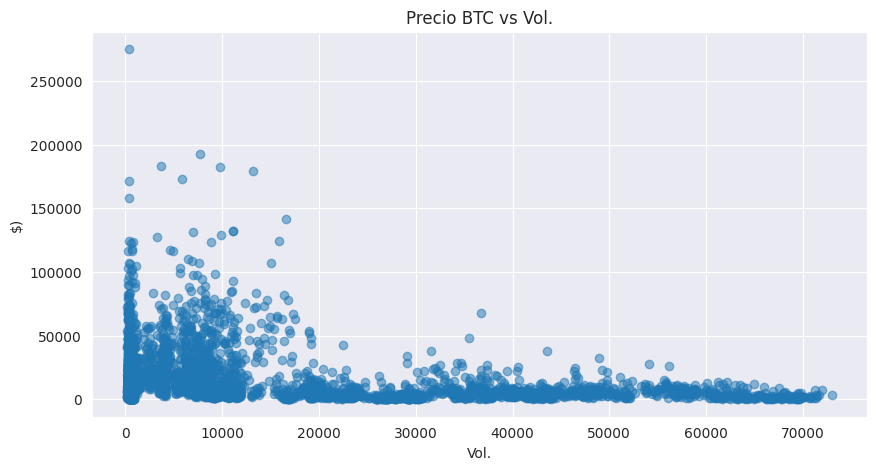

In [141]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Price'], df['Volumen'], alpha=0.5)
plt.title('Precio BTC vs Vol.')
plt.xlabel('Vol.')
plt.ylabel('$)')
plt.show()

Podemos ver la relación entre los montos de los préstamos y el ingreso anual de los solicitantes. a mayor ingreso mayores son los montos.

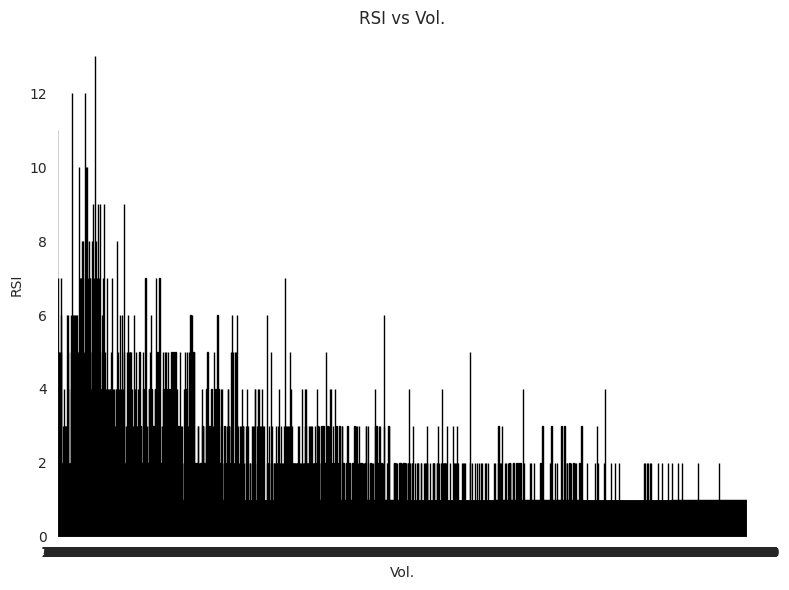

In [142]:
df['RSI'] = df['Volumen'].astype('category')
ordered_dependents = df['Volumen'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ordered_dependents.plot(kind='bar', edgecolor='black')
plt.title('RSI vs Vol.')
plt.xlabel('Vol.')
plt.ylabel('RSI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

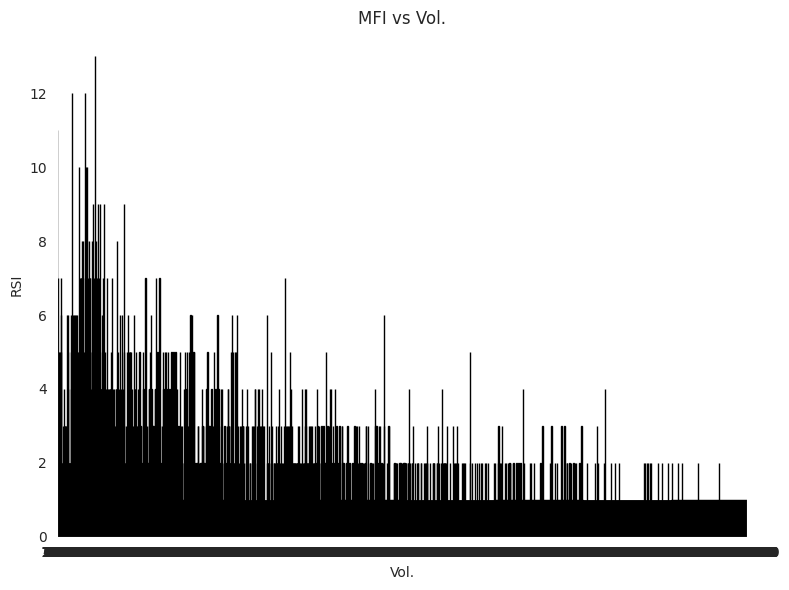

In [143]:
df['MFI'] = df['Volumen'].astype('category')
ordered_dependents = df['Volumen'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ordered_dependents.plot(kind='bar', edgecolor='black')
plt.title('MFI vs Vol.')
plt.xlabel('Vol.')
plt.ylabel('RSI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

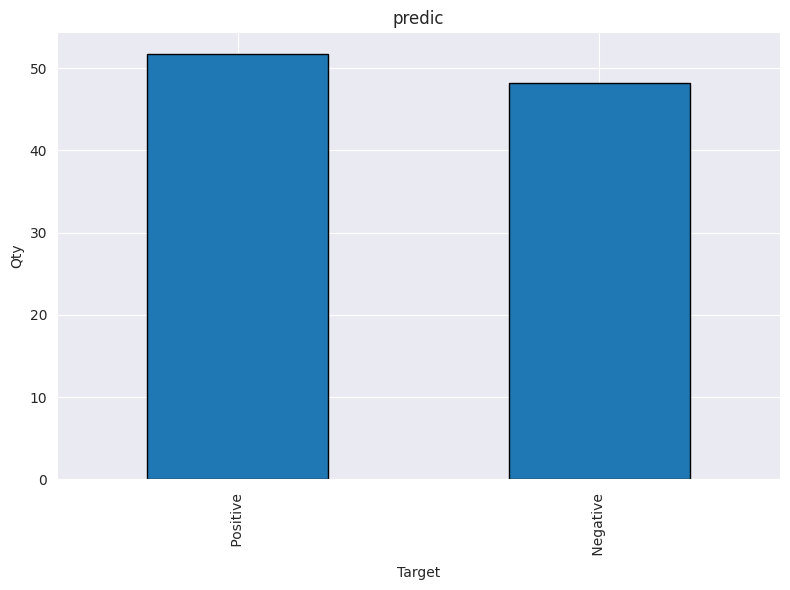

In [144]:
plt.figure(figsize=(8, 6))
df['Target'].value_counts(normalize=True).mul(100).plot(kind='bar', edgecolor='black')
plt.title('predic')
plt.xlabel('Target')
plt.ylabel('Qty')
plt.tight_layout()
plt.show()

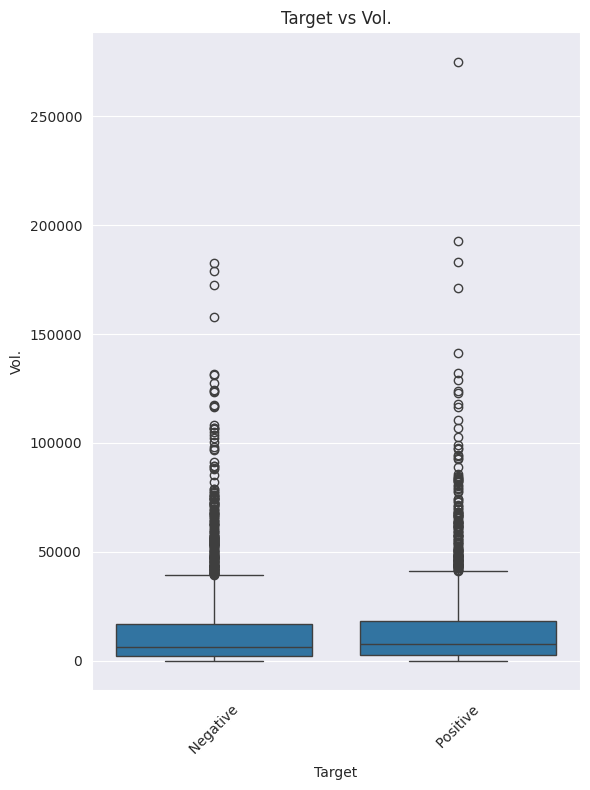

In [145]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='Target', y='Volumen', data=df)
plt.title('Target vs Vol.')
plt.xlabel('Target')
plt.ylabel('Vol.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

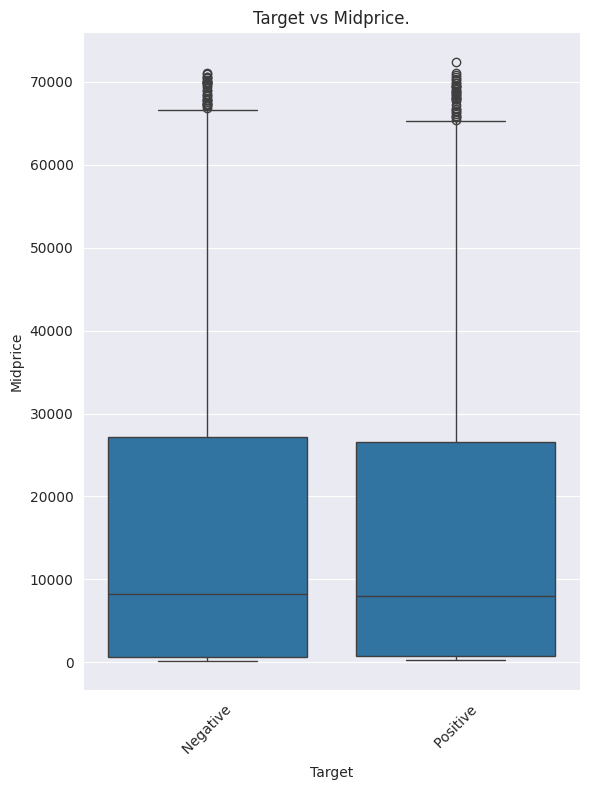

In [146]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='Target', y='Midprice', data=df)
plt.title('Target vs Midprice.')
plt.xlabel('Target')
plt.ylabel('Midprice')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

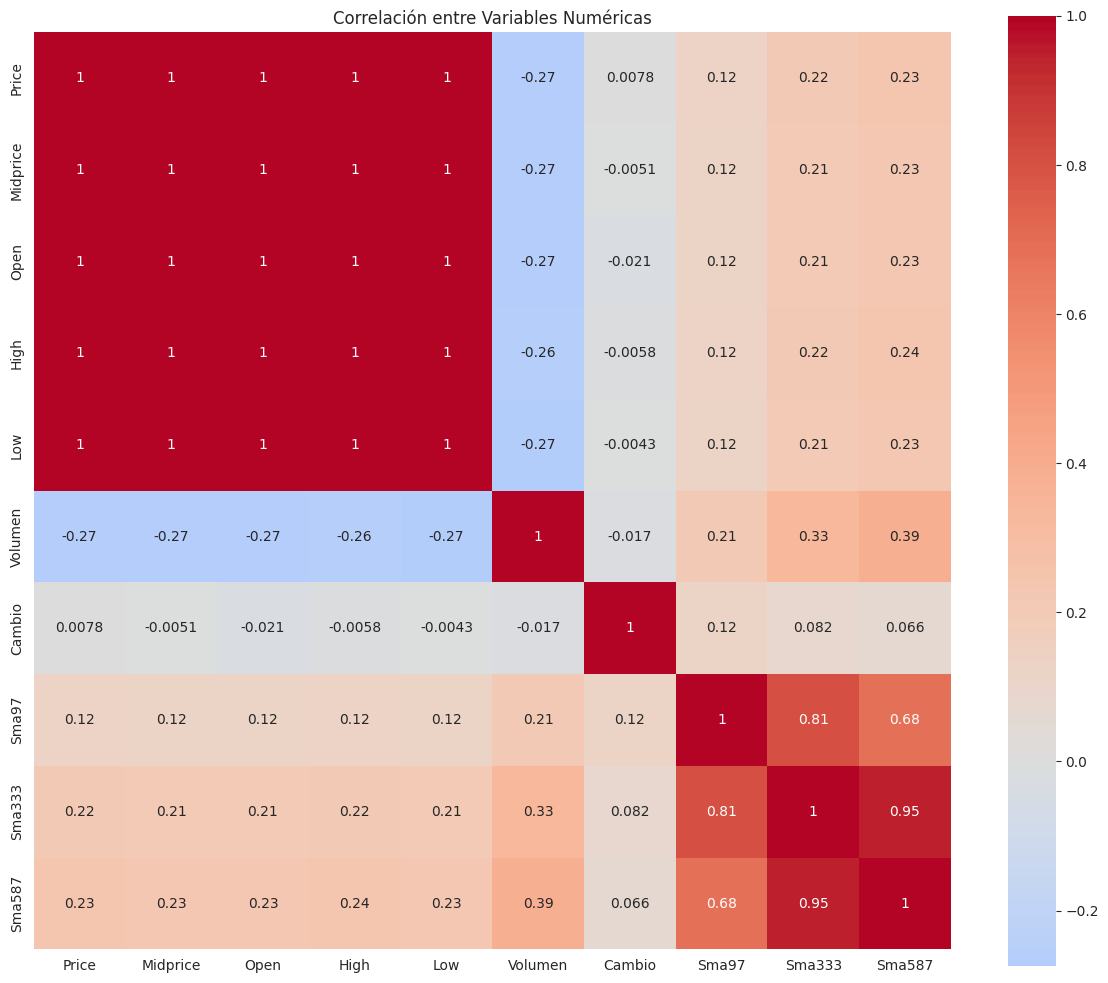

In [147]:
correlaciones = df.select_dtypes(include=['float64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

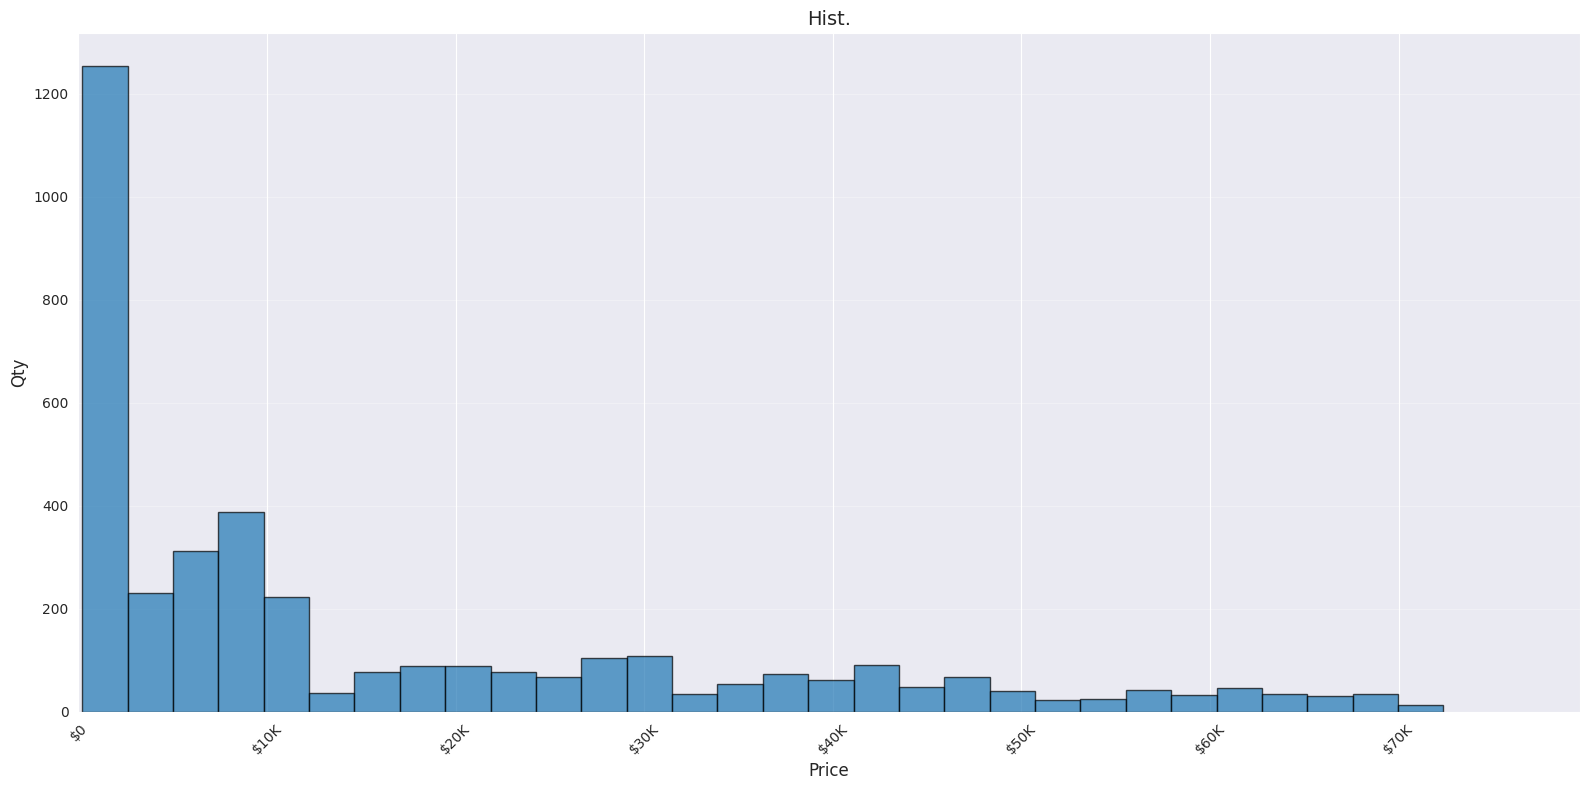

In [148]:
plt.figure(figsize=(16, 8))
plt.hist(df['Midprice'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Hist.', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Qty', fontsize=12)
plt.grid(axis='y', alpha=0.3)

def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        s = '${:1.0f}K'.format(x*1e-3)
    else:
        s = '${:1.0f}'.format(x)
    return s

formatter = ticker.FuncFormatter(currency)
plt.gca().xaxis.set_major_formatter(formatter)

max_income = df['Midprice'].max()
plt.xlim(0, max_income * 1.1)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La Distribución del ingreso entre los solicitantes es muy pareja. se realizaron mejoras visuales para el eje X y los datos que suministra.

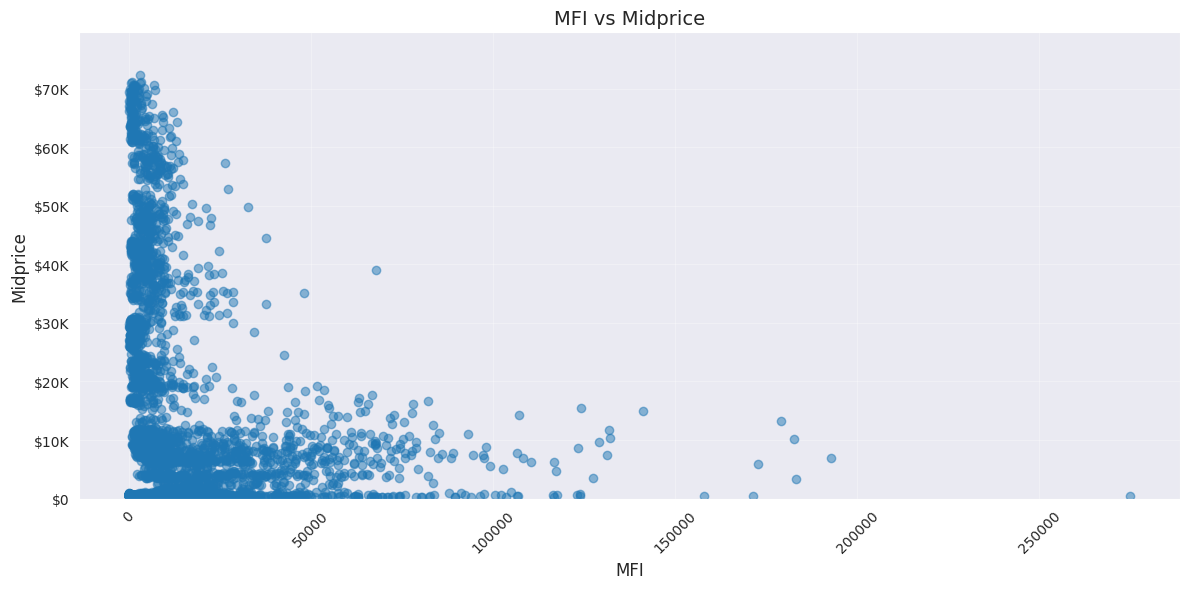

In [149]:
plt.figure(figsize=(12, 6))
plt.scatter(df['MFI'], df['Midprice'], alpha=0.5)
plt.title('MFI vs Midprice', fontsize=14)
plt.xlabel('MFI', fontsize=12)
plt.ylabel('Midprice', fontsize=12)

def currency(x, pos):
    if x >= 1e9:
        s = '${:1.1f}B'.format(x*1e-9)
    elif x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        s = '${:1.0f}K'.format(x*1e-3)
    else:
        s = '${:1.0f}'.format(x)
    return s

formatter = ticker.FuncFormatter(currency)
plt.gca().yaxis.set_major_formatter(formatter)
plt.ticklabel_format(style='plain', axis='x')
max_assets = df['Midprice'].max()
plt.ylim(0, max_assets * 1.1)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [150]:
df.columns

Index(['Date', 'Price', 'Midprice', 'Open', 'High', 'Low', 'Volumen', 'Cambio',
       'Target', 'MFI', 'RSI', 'Sma97', 'Sma333', 'Sma587'],
      dtype='object')

### Limpiamos los espacios en blanco al principio y al final de los valores de las columnas object

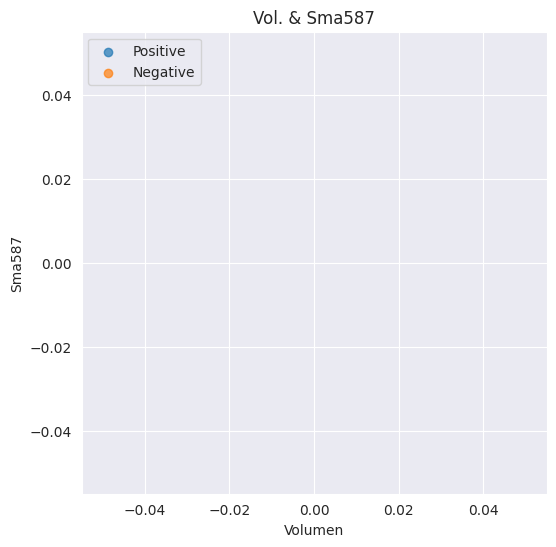

In [151]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df[df['Target']=='Positive']['Volumen'], df[df['Target']=='Positive']['Sma587'], alpha=0.7)
ax.scatter(df[df['Target']=='Negative']['Volumen'], df[df['Target']=='Negative']['Sma587'], alpha=0.7)
ax.set_title('Vol. & Sma587')
ax.set_xlabel('Volumen')
ax.set_ylabel('Sma587')
ax.legend(['Positive', 'Negative'], loc='upper left')

In [152]:
corr_coeff = df['Midprice'].corr(df['Sma587'], method='pearson')
print("Coeficiente de correlación de Pearson:", corr_coeff)

Coeficiente de correlación de Pearson: 0.23339677863586636


In [153]:
corr_coeff = df['Midprice'].corr(df['Sma333'], method='pearson')
print("Coeficiente de correlación de Pearson:", corr_coeff)

Coeficiente de correlación de Pearson: 0.21367500147231425


In [154]:
corr_coeff = df['Midprice'].corr(df['Sma97'], method='pearson')
print("Coeficiente de correlación de Pearson:", corr_coeff)

Coeficiente de correlación de Pearson: 0.12281083880788689


In [155]:
corr_coeff = df['MFI'].corr(df['Sma587'], method='pearson')
print("Coeficiente de correlación de Pearson:", corr_coeff)

Coeficiente de correlación de Pearson: 0.3852731989593797


In [156]:
corr_coeff = df['RSI'].corr(df['Sma587'], method='pearson')
print("Coeficiente de correlación de Pearson:", corr_coeff)

Coeficiente de correlación de Pearson: 0.3852731989593797


In [157]:
corr_coeff = df['Price'].corr(df['RSI'], method='pearson')
print("Coeficiente de correlación de Pearson:", corr_coeff)

Coeficiente de correlación de Pearson: -0.26782401883847595


calculamos la correlación entre algunas variables en caracter informativo y de análisis.

# Regresión logística

features = X <br>
target = y

In [209]:
df_approved = df[df['Target'] == 'Positive']

definimos nuestra variable target : Préstamos aprobados



In [211]:
X = df[['Volumen','MFI','RSI','Cambio']]

In [212]:
df['Target'] = df['Target'].str.strip()

In [213]:
y = df['Target'].replace({'Positive': 1, 'Negative': 0})

In [214]:
y = df['Target'].replace({'Positive': 1, 'Negative': 0})
print(y.value_counts())
print(y.dtype)

Target
1    1971
0    1837
Name: count, dtype: int64
int64


In [215]:
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (3808, 4)
Forma de y: (3808,)


In [216]:
print("Clases únicas en y:", np.unique(y))

Clases únicas en y: [0 1]


### Creo la instancia del modelo y lo entreno

In [217]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [218]:
X2= X.values
y2=y


# PCA

mi variable X contiene más de 2 componentes, aplico PCA.


In [219]:
df_2 = df[['Volumen','MFI','RSI','Cambio']]
df_2.head()

,Volumen,MFI,RSI,Cambio
0,1460.0,1460.0,1460.0,-0.0092
1,1370.0,1370.0,1370.0,-0.0082
2,970.0,970.0,970.0,-0.0047
3,1310.0,1310.0,1310.0,0.0234
4,1700.0,1700.0,1700.0,0.0147


In [220]:
modelo_pca = PCA(n_components=4)
modelo_pca.fit(df_2)

PCA(n_components=4)

Entrenamos el modelo

In [221]:
modelo_pca.components_

array([[ 5.77350269e-01,  5.77350269e-01,  5.77350269e-01,
        -1.77724959e-08],
       [-1.02614921e-08, -1.02606869e-08, -1.02606868e-08,
        -1.00000000e+00],
       [-8.16496581e-01,  4.08248290e-01,  4.08248290e-01,
         6.57510796e-13],
       [-0.00000000e+00, -7.07106781e-01,  7.07106781e-01,
         2.21620050e-18]])

In [222]:
modelo_pca.explained_variance_ratio_[0]

0.9999999999988685

In [223]:
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = df_2.columns, index=lista_componentes)
componentes

,Volumen,MFI,RSI,Cambio
PC1,5.773503e-01,5.773503e-01,5.773503e-01,-1.777250e-08
PC2,-1.026149e-08,-1.026069e-08,-1.026069e-08,-1.000000e+00
PC3,-8.164966e-01,4.082483e-01,4.082483e-01,6.575108e-13
PC4,-0.000000e+00,-7.071068e-01,7.071068e-01,2.216200e-18


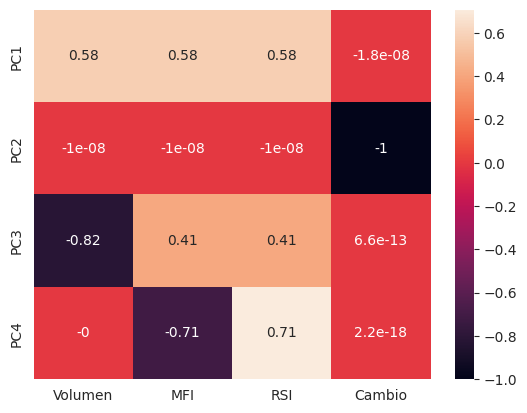

In [224]:
ax = sns.heatmap(componentes, annot=True)

In [225]:
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2)*100)

['PC1', 'PC2', 'PC3', 'PC4']
[100.   0.   0.   0.]


Vemos la varianza explicada de cada componente

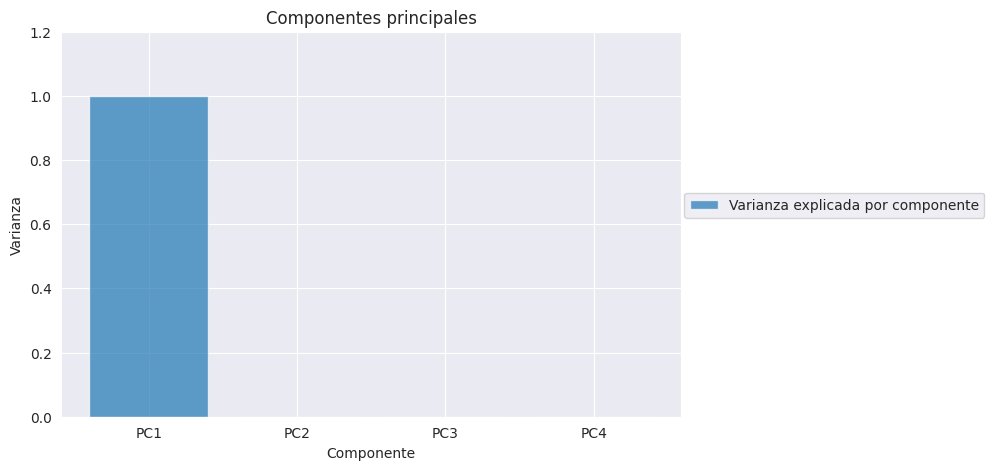

In [226]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(lista_componentes, modelo_pca.explained_variance_ratio_, alpha=0.7, label='Varianza explicada por componente')


ax.set_title('Componentes principales')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor = (1.5, 0.6))

In [227]:
proyecciones = pd.DataFrame(modelo_pca.transform(df_2), index=df_2.index,columns=lista_componentes)
proyecciones

,PC1,PC2,PC3,PC4
0,-22276.811488,0.011432,6.574444e-14,-1.032611e-12
1,-22432.696061,0.010435,-1.296634e-13,-1.195148e-12
2,-23125.516384,0.006948,3.149507e-13,-7.048733e-13
3,-22536.619109,-0.021163,3.667334e-13,-1.303505e-12
4,-21861.119294,-0.012475,-2.029826e-15,-5.991800e-13
...,...,...,...,...
3841,-24580.439062,-0.044627,-2.684057e-13,-2.221882e-12
3842,-24788.285159,-0.015023,-2.461237e-13,-2.438597e-12
3843,-24667.041602,0.015175,8.862473e-14,-1.705850e-12
3844,-24580.439062,-0.029827,-2.781369e-13,-2.221882e-12


Luego de aplicar transform guardamos en un dataframe

In [228]:
proyecciones.drop(columns=['PC3', 'PC4'], inplace=True)

Descarto las variables nuevas PC3 y PC4. Nos quedamos con PC1 y PC2 que parecen explicar mejor las decisiones de aprobación de préstamos. PC2 contiene el indice CIBIL y basado en nuestros análisis anteriores creo relevante incluirlo enel modelo.

In [229]:
proyecciones

,PC1,PC2
0,-22276.811488,0.011432
1,-22432.696061,0.010435
2,-23125.516384,0.006948
3,-22536.619109,-0.021163
4,-21861.119294,-0.012475
...,...,...
3841,-24580.439062,-0.044627
3842,-24788.285159,-0.015023
3843,-24667.041602,0.015175
3844,-24580.439062,-0.029827


In [230]:
proyecciones['Target'] = df['Target']
proyecciones

,PC1,PC2,Target
0,-22276.811488,0.011432,Negative
1,-22432.696061,0.010435,Negative
2,-23125.516384,0.006948,Negative
3,-22536.619109,-0.021163,Positive
4,-21861.119294,-0.012475,Positive
...,...,...,...
3841,-24580.439062,-0.044627,Positive
3842,-24788.285159,-0.015023,Positive
3843,-24667.041602,0.015175,Negative
3844,-24580.439062,-0.029827,Positive


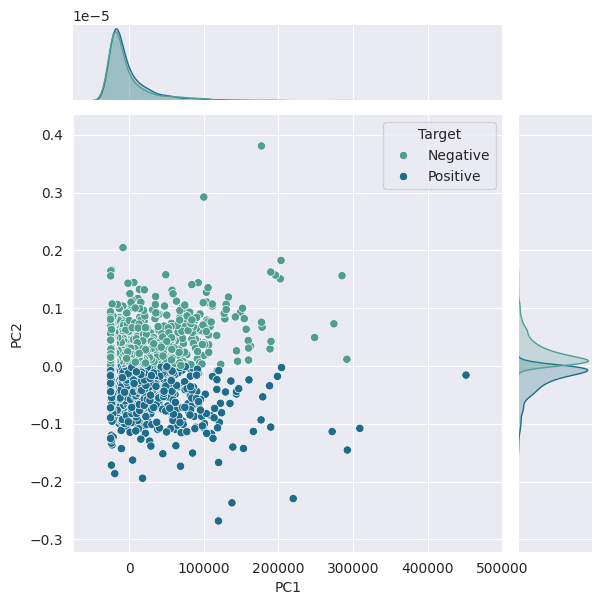

In [231]:
g = sns.jointplot(x='PC1', y='PC2', data=proyecciones, hue="Target", palette="crest")
g.fig.set_figwidth(6)

Graficamos la distribución de los valores en las dos variables PC1 y PC2


In [232]:
proyecciones.Target.value_counts()

Target
Positive    1971
Negative    1837
Name: count, dtype: int64

Estan levemente balanceadas

In [233]:
scaler = StandardScaler()
df_2_scaled = scaler.fit_transform(df_2)

In [234]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_2_scaled)

In [235]:
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

Plasmamos las variables de PCA en un dataframe

In [236]:
X = df_pca[['PC1', 'PC2']]

Definimos X para la regresión logistica

In [237]:
y = df['Target'].replace({'Positive': 1, 'Negative': 0})

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [239]:
modelo = LogisticRegression(random_state=2)
modelo.fit(X_train, y_train)

LogisticRegression(random_state=2)

Entrenamos el modelo

In [240]:
y_pred = modelo.predict(X_test)

Test

In [241]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo: {accuracy:.2f}")


Exactitud del modelo: 1.00


In [198]:
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Informe de clasificación:
              precision    recall  f1-score   support

           0       0.50      0.21      0.29       369
           1       0.52      0.80      0.63       393

    accuracy                           0.51       762
   macro avg       0.51      0.51      0.46       762
weighted avg       0.51      0.51      0.47       762



In [242]:
print("\nCoeficientes del modelo:")
print("PC1:", modelo.coef_[0][0])
print("PC2:", modelo.coef_[0][1])


Coeficientes del modelo:
PC1: -0.15780302686558126
PC2: -15.070920237865819


In [243]:
print("\nIntercept:")
print(modelo.intercept_[0])


Intercept:
0.6993372115886427


In [244]:
importancia = np.abs(modelo.coef_[0])
importancia_relativa = importancia / np.sum(importancia)
print("\nImportancia relativa de las características:")
print("PC1:", importancia_relativa[0])
print("PC2:", importancia_relativa[1])


Importancia relativa de las características:
PC1: 0.01036219675953016
PC2: 0.9896378032404698


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


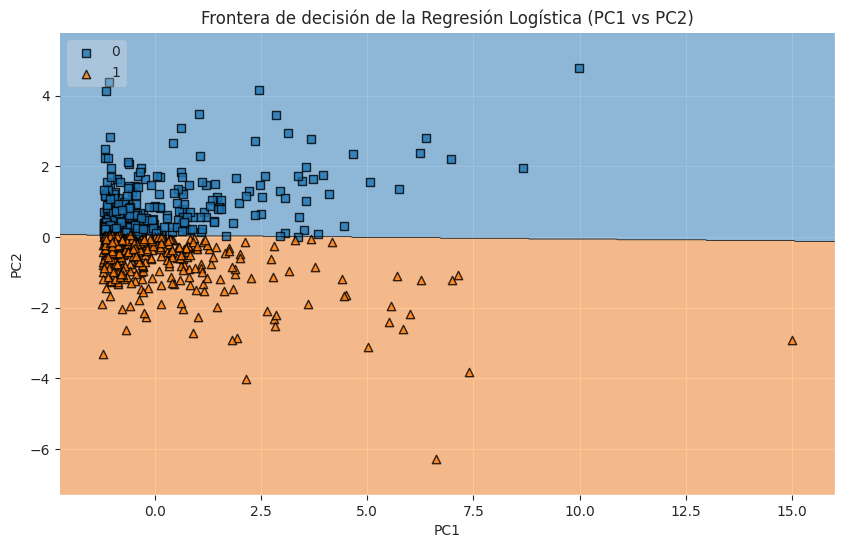

In [245]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test.values, y_test.values, clf=modelo, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Frontera de decisión de la Regresión Logística (PC1 vs PC2)')
plt.show()

In [246]:
print("\nVarianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)


Varianza explicada por cada componente principal:
[7.50104630e-01 2.49895370e-01 7.21214114e-32 7.52542085e-42]


In [247]:
print("\nMatriz de componentes principales:")
print(pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df_2.columns))


Matriz de componentes principales:
              PC1       PC2           PC3           PC4
Volumen  0.577290 -0.008350 -8.164964e-01  5.091965e-04
MFI      0.577290 -0.008350  4.086892e-01  7.068520e-01
RSI      0.577290 -0.008350  4.078072e-01 -7.073612e-01
Cambio  -0.014463 -0.999895  2.602085e-18 -3.295975e-17


# KNN

En la busqueda de mejorar los resultados de mi modelo pasamos rapidamente a aplicar KNN con las variables PC1 y PC2, así podré comparar ambos resultados y mantener el que prediga con menor error o en deifnitiva mayor probabilidad de acertación.

Exactitud del modelo KNN: 0.99

Informe de clasificación para KNN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       369
           1       0.99      0.99      0.99       393

    accuracy                           0.99       762
   macro avg       0.99      0.99      0.99       762
weighted avg       0.99      0.99      0.99       762



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


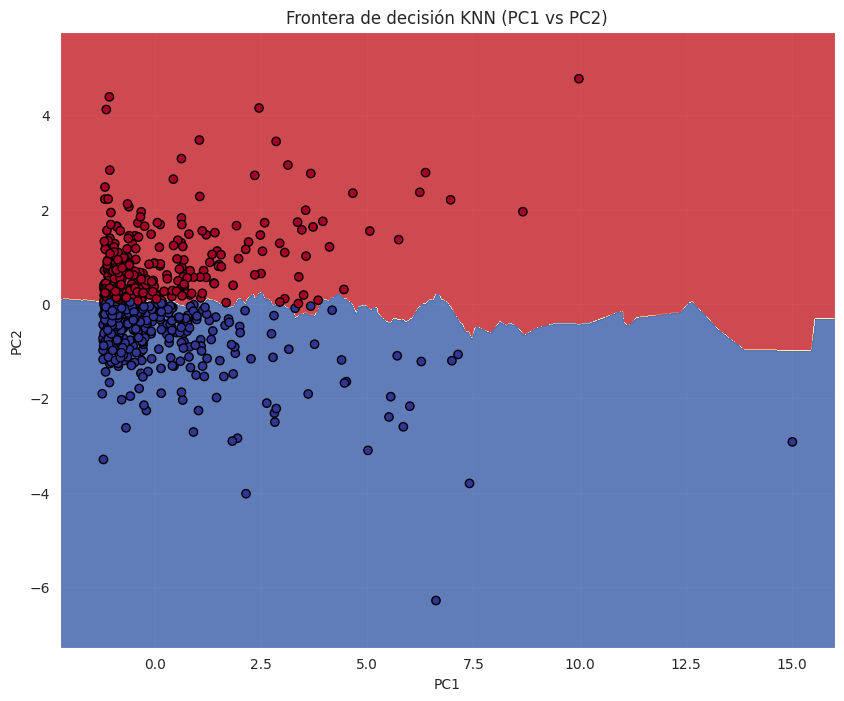


Comparación de rendimiento:
Exactitud de Regresión Logística: 1.00
Exactitud de KNN: 0.99


In [249]:
X = df_pca[['PC1', 'PC2']]
y = df['Target'].replace({'Positive': 1, 'Negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exactitud del modelo KNN: {accuracy_knn:.2f}")

print("\nInforme de clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))

# Frontera de decisión
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_test.values, y_test.values, knn, 'Frontera de decisión KNN (PC1 vs PC2)')

print("\nComparación de rendimiento:")
print(f"Exactitud de Regresión Logística: {accuracy:.2f}")
print(f"Exactitud de KNN: {accuracy_knn:.2f}")